In [6]:
# load data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May_CM_Untagged/data_words.csv','rU') as f1:
    data_words=list( csv.reader(f1) )

In [3]:
print data_words[186857]

['thank', 'you', 'for', 'calling', 'credit', 'services', 'all', 'of', 'our', 'agents', 'are', 'busy', 'now', 'please', 'hold', 'and', 'your', 'call', 'will', 'be', 'answered', 'by', 'the', 'next', 'available', 'agent', 'this', 'thank', 'you', 'for', 'calling', 'credit', 'services', 'all', 'of', 'our', 'agents', 'are', 'busy', 'now', 'please', 'hold', 'and', 'your', 'call', 'will', 'be', 'answered', 'by', 'the', 'next', 'available', 'agent', 'this', 'is', 'thank', 'you', 'for', 'calling', 'credit', 'services', 'all', 'of', 'our', 'agents', 'are', 'busy', 'now', 'please', 'hold', 'and', 'your', 'call', 'will', 'be', 'answered', 'by', 'the', 'next', 'available', 'agent', 'hello', 'thank', 'you', 'for', 'calling', 'credit', 'services', 'all', 'of', 'our', 'agents', 'are', 'busy', 'now', 'please', 'hold', 'and', 'your', 'call', 'will', 'be', 'answered', 'by', 'the', 'next', 'available', 'agent', 'this', 'is', 'thank', 'you', 'for', 'calling', 'credit', 'services', 'all', 'of', 'our', 'agent

In [1]:
# load data
import csv
with open('/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May_CM_Untagged/data_words_nostops.csv','rU') as f1:
    data_words_nostops=list( csv.reader(f1) )

IOError: [Errno 2] No such file or directory: '/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May_CM_Untagged/data_words_nostops.csv'

In [2]:
print data_words_nostops[208061]

NameError: name 'data_words_nostops' is not defined

In [1]:
import glob
import os

os.chdir("/data1/call_miner/Vinyas_Call_miner/call_miner")
#file_list = glob.glob(os.path.join(os.getcwd(), "Feb_Text_data", "*.txt"))
file_list1 = sorted(glob.glob(os.path.join(os.getcwd(), "May_CM_Untagged", "*.txt")))

scripts1 = []

for file_path1 in file_list1:
    with open(file_path1) as f_input:
        scripts1.append((file_path1.replace( '/data1/call_miner/Vinyas_Call_miner/call_miner/May_CM_Untagged/', ''),f_input.read()))
        

In [2]:
import pandas as pd
df_script1 = pd.DataFrame(scripts1, columns=['Eureka_ID', 'Content'])
script_data1=df_script1['Content'].values.tolist()

In [3]:
import re
%time script_data1 = [re.sub('\s+', ' ', sent) for sent in script_data1]

# Remove distracting single quotes
%time script_data1 = [re.sub("\'", "", sent) for sent in script_data1]

CPU times: user 1min 13s, sys: 939 ms, total: 1min 14s
Wall time: 1min 14s
CPU times: user 4.33 s, sys: 485 ms, total: 4.82 s
Wall time: 4.77 s


In [94]:
script_data1[186857]

'thank you for calling credit services all of our agents are busy now please hold and your call will be answered by the next available agent\r\nthis\r\nthank you for calling credit services all of our agents are busy now please hold and your call will be answered by the next available agent\r\nthis is\r\nthank you for calling credit services all of our agents are busy now please hold and your call will be answered by the next available agent hello thank you for calling credit services all of our agents are busy now please hold and your call will be answered by the next available agent\r\nthis is\r\nthank you for calling credit services all of our agents are busy now please hold and your call will be answered by the next available agent thank you for calling credit services all of our agents are busy now please hold and your call will be answered by the next available agent\r\nhey\r\nthank you for calling credit services all of our agents are busy now please hold and your call will be a

In [29]:
#flatten the lists
all_lemma_words = [y for x in data_words for y in x]

In [3]:
print all_lemma_words[1]

use


In [9]:
import nltk.collocations
from nltk.probability import FreqDist
text=nltk.Text(all_lemma_words)
fd = FreqDist(len(w) for w in text)
fd.most_common()

[(4, 20383950),
 (5, 10191776),
 (6, 9040414),
 (3, 8940471),
 (7, 7763972),
 (8, 3021285),
 (9, 1783449),
 (2, 1351400),
 (10, 1026535),
 (11, 383391),
 (12, 177806),
 (13, 93139),
 (14, 20356),
 (1, 2171),
 (15, 2073)]

In [10]:
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 2, 3, 4, 5,7,10:
    all_counts[size] = FreqDist(ngrams(all_lemma_words, size))

In [11]:
all_counts[5].most_common(5)

[(('credit', 'agent', 'available', 'agent', 'credit'), 10410),
 (('agent', 'available', 'agent', 'credit', 'agent'), 10276),
 (('available', 'agent', 'credit', 'agent', 'available'), 10078),
 (('agent', 'credit', 'agent', 'available', 'agent'), 10071),
 (('available', 'available', 'available', 'available', 'available'), 4014)]

In [3]:
import nltk
bgs = nltk.bigrams(all_lemma_words)
bdist = nltk.FreqDist(bgs)

In [5]:
with open("/data1/call_miner/Vinyas_Call_miner/call_miner/Lavanya/May_CM_Untagged/trigram_dist.csv", "wb") as fp:
    writer = csv.writer(fp, quoting=csv.QUOTE_ALL)
    writer.writerows(tdist.most_common(5000))

In [3]:
import nltk
tgs = nltk.trigrams(all_lemma_words)
tdist = nltk.FreqDist(tgs)

In [16]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

# change this to read in your data
bifinder = BigramCollocationFinder.from_words(all_lemma_words)

trifinder = TrigramCollocationFinder.from_words(all_lemma_words)

# only bigrams that appear 3+ times
bifinder.apply_freq_filter(3)

# return the 10 n-grams with the highest PMI
print trifinder.nbest(bigram_measures.pmi, 10)

[('funds', 'sep', 'sep'), ('throwing', 'throwing', 'throwing'), ('allocations', 'frustrated', 'frustrated'), ('sep', 'doesnt', 'sep'), ('unemployment', 'unemployment', 'unemployment'), ('institutions', 'commercially', 'data'), ('sep', 'sep', 'close'), ('complaining', 'complaining', 'complaining'), ('reallocation', 'reallocation', 'reflected'), ('financial', 'institutions', 'commercially')]


In [17]:
sorted(trifinder.nbest(trigram_measures.raw_freq, 2))

[('attempt', 'collect', 'debt'), ('satisfied', 'satisfied', 'satisfied')]

In [20]:
tdist.most_common(50)

[(('satisfied', 'satisfied', 'satisfied'), 96425),
 (('attempt', 'collect', 'debt'), 48882),
 (('collect', 'debt', 'information'), 48866),
 (('advised', 'attempt', 'collect'), 40440),
 (('account', 'advised', 'attempt'), 39684),
 (('number', 'account', 'number'), 32042),
 (('rate', 'satisfaction', 'terms'), 31938),
 (('assisting', 'assisting', 'assisting'), 26502),
 (('payment', 'number', 'statement'), 25811),
 (('modify', 'payment', 'number'), 25801),
 (('account', 'number', 'account'), 25747),
 (('debt', 'information', 'bank'), 23801),
 (('electronic', 'debit', 'bank'), 22105),
 (('debit', 'bank', 'pay'), 21199),
 (('authorize', 'electronic', 'debit'), 19609),
 (('satisfied', 'rate', 'satisfaction'), 19272),
 (('satisfied', 'satisfied', 'rate'), 18847),
 (('survey', 'keypad', 'enter'), 18562),
 (('checking', 'account', 'number'), 18381),
 (('social', 'security', 'number'), 16924),
 (('number', 'statement', 'confirms'), 16900),
 (('credit', 'services', 'help'), 16859),
 (('statement',

In [5]:
import collections
import nltk

bgm    = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(all_lemma_words)
scored = finder.score_ngrams( bgm.likelihood_ratio  )
# Group bigrams by first word in bigram.                                        
prefix_keys = collections.defaultdict(list)
for key, scores in scored:
   prefix_keys[key[0]].append((key[1], scores))

# Sort keyed bigrams by strongest association.                                  
for key in prefix_keys:
   prefix_keys[key].sort(key = lambda x: -x[1])


In [25]:
print ('payment', prefix_keys['payment'][:5])
print ('auto', prefix_keys['auto'][:5])
print ('website', prefix_keys['website'][:5])

('payment', [('payment', 61165.27949135366), ('posted', 47471.61300631595), ('card', 26611.1328071381), ('post', 26106.141783947758), ('processed', 15433.574006488849)])
('auto', [])
('website', [('website', 8209.040707171094), ('mysynchrony', 6546.382954599313), ('www', 2223.4919597557946), ('log', 1561.13922801341), ('rewards', 1449.3647608017313)])


In [15]:
prefix_keys['army'][:30]

[('army', 220.85737117798325),
 ('force', 28.127053129925525),
 ('help', 25.51018947073633),
 ('retired', 20.26565101848498),
 ('duty', 12.051218260159327),
 ('military', 11.897504407108007),
 ('primary', 10.646391515183712),
 ('public', 10.44566508752396),
 ('systems', 10.1486321706563),
 ('emergency', 9.901821489962131),
 ('server', 7.764206182915953),
 ('robot', 7.260287368257533),
 ('bug', 7.004071377240213),
 ('reduction', 6.423399681183826),
 ('case', 6.14501057229775),
 ('location', 5.996997826736685),
 ('unfortunately', 5.9701721641589955),
 ('understand', 5.468948482759254),
 ('finance', 5.213734533679775),
 ('escalated', 4.985670990705098),
 ('balance', 4.3858805421060705),
 ('deals', 4.379147810068536),
 ('zip', 4.343294673901309),
 ('department', 4.262512632647457),
 ('private', 4.008851338017845),
 ('social', 3.9636705352171857),
 ('opened', 3.941403112978216),
 ('cross', 3.873871377576209),
 ('allowed', 3.868178970981037),
 ('inconvenience', 3.6496087435220943)]

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.rcParams.update({'font.size': 22})


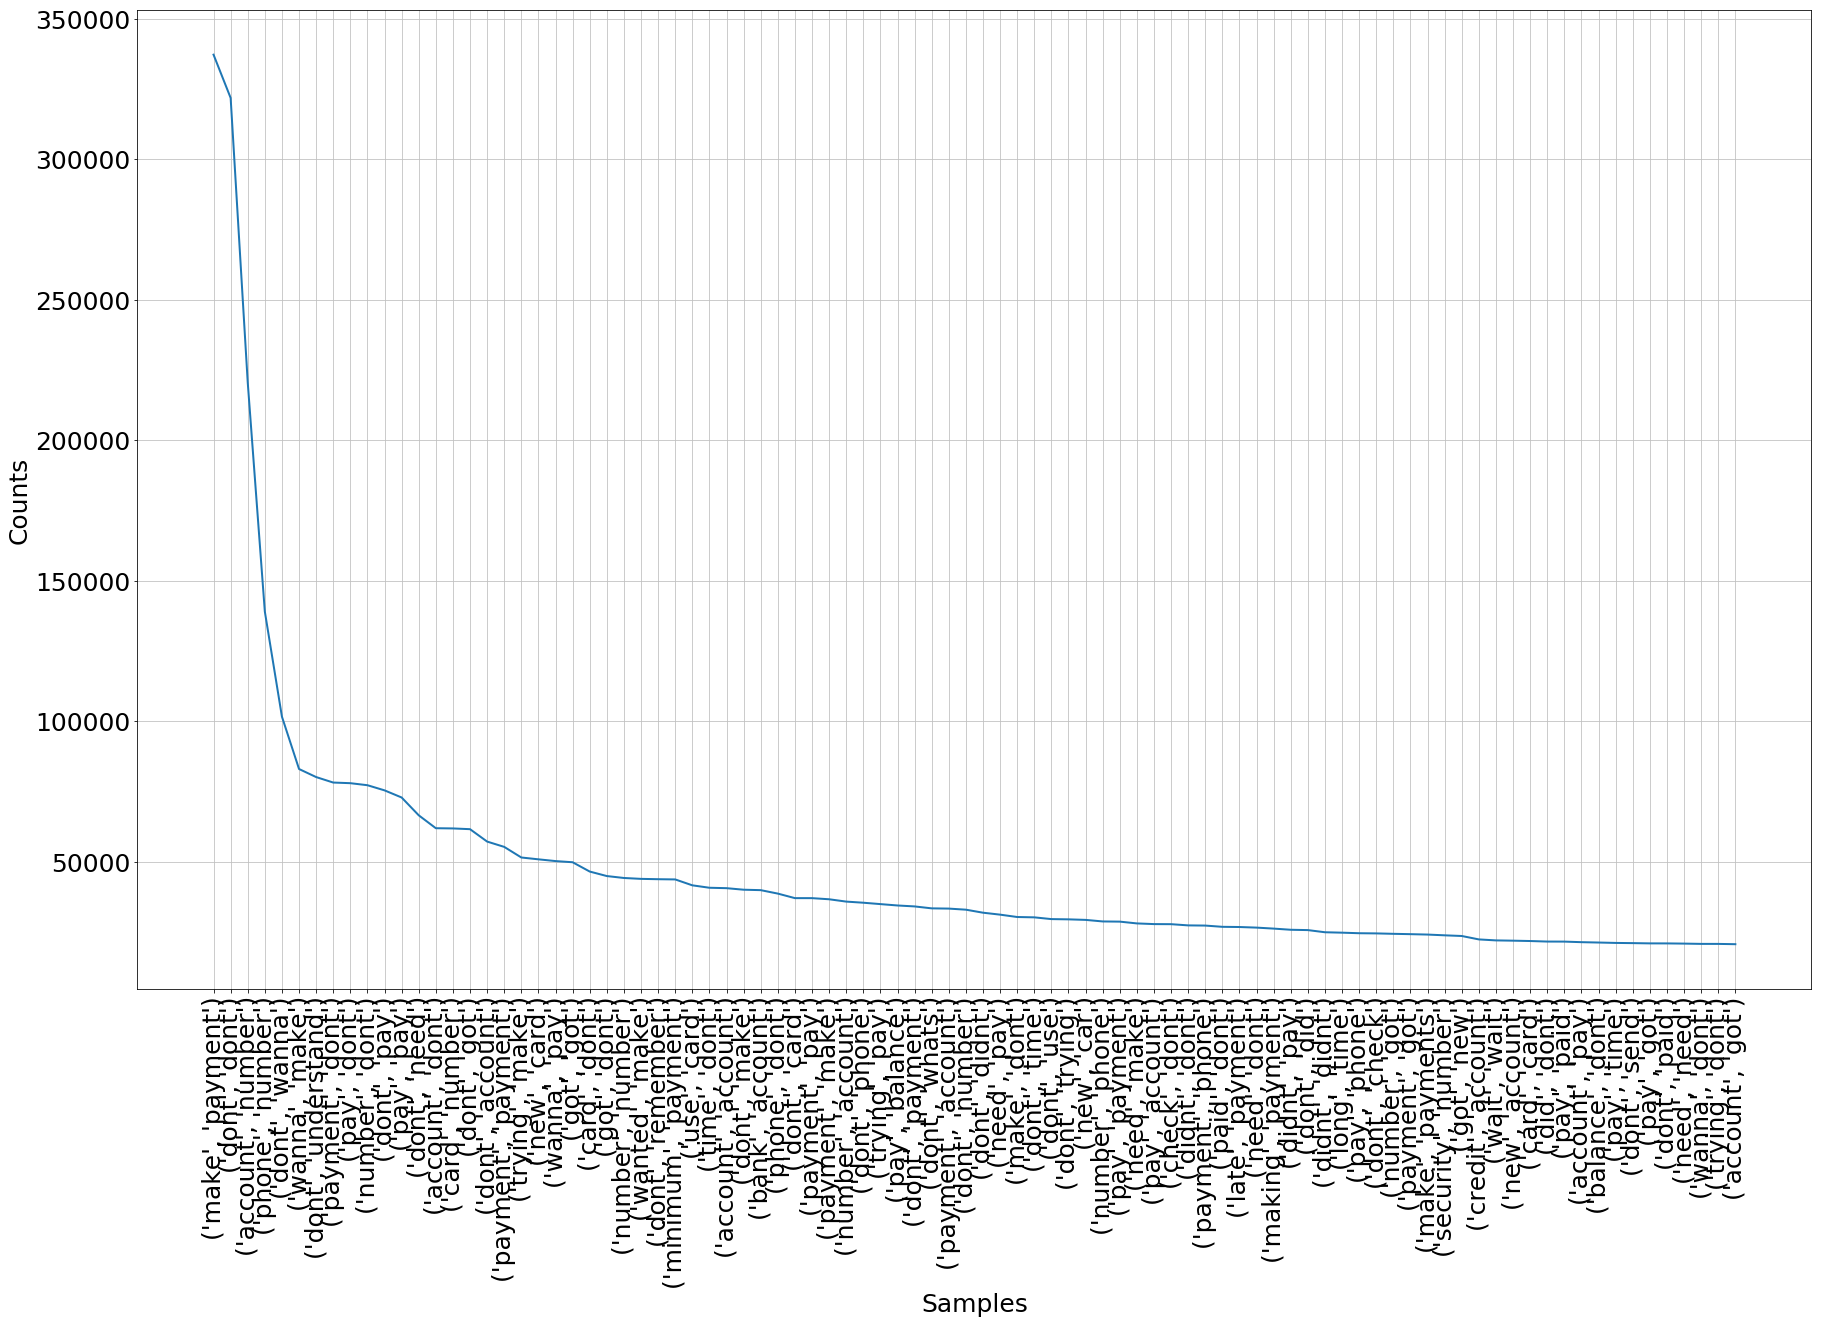

In [8]:
plt.figure(figsize=(30, 18))
plt.rcParams.update({'font.size': 25})
bdist.plot(90,cumulative=False)

In [17]:
from nltk.app import concordance

In [30]:
import nltk
text = nltk.Text(all_lemma_words)

In [31]:
text.concordance('payment',100,100)

Displaying 100 of 602121 matches:
 to colette mellon okay so it looks like that payment was readjusted it looks like it let me see he
 take look at some no okay so looks like that payment was returned for insufficient funds so it mea
 for insufficient funds so it means that that payment did not go through so we had to add it back t
 have for me know thank you just have to have payment to be done so can do that online register mys
ou say be that man he put ten dollars on your payment yes okay yes you have to go back to the store
e on the year and michael did you concede the payment but just the ill payment tell me how much is 
 did you concede the payment but just the ill payment tell me how much is it yes the payment you ma
he ill payment tell me how much is it yes the payment you made was ten dollars yes is standing out 
an you know there for you to cash the minimum payment required is one hundred forty four dollars an
r so please would you like me to process your payment here on my e

In [46]:
import sys
# Open the file
fileconcord = open('/data1/call_miner/Vinyas_Call_miner/call_miner/auto_QA_results.txt',"w")
# Save old stdout stream
tmpout = sys.stdout
# Redirect all "print" calls to that file
sys.stdout = fileconcord
# Init the method
text.concordance('auto',300,300)
# Close file
fileconcord.close()
# Reset stdout in case you need something else to print
sys.stdout = tmpout

In [17]:
def n_concordance_tokenised(text,phrase,left_margin=15,right_margin=15):
    
    phraseList=phrase.split(' ')

    c = nltk.ConcordanceIndex(text.tokens, key = lambda s: s.lower())

    #Find the offset for each token in the phrase
    offsets=[c.offsets(x) for x in phraseList]
    offsets_norm=[]
    #For each token in the phraselist, find the offsets and rebase them to the start of the phrase
    for i in range(len(phraseList)):
        offsets_norm.append([x-i for x in offsets[i]])
  
    intersects=set(offsets_norm[0]).intersection(*offsets_norm[1:])

    concordance_txt = ([text.tokens[list (map(lambda x: x-left_margin if (x-left_margin)>0 else 0,[offset]))[0]:offset+len(phraseList)+right_margin]
                    for offset in intersects])

    outputs=[''.join([x+' ' for x in con_sub]) for con_sub in concordance_txt]
    return outputs
 
def n_concordance(txt,phrase,left_margin=100,right_margin=100):
    tokens = nltk.word_tokenize(txt)
    text = nltk.Text(tokens)
  
    return n_concordance_tokenised(text,phrase,left_margin=left_margin,right_margin=right_margin)

In [18]:
n_concordance_tokenised(text,'make payment')

['forget modify payment number statement_confirm_authorize electronic_debit_bank pay symphony master card account correct payment confirmation number make payment symphony master card ward confirm account receive card mail try card didnt pay open activate ',
 'cell phonenumber home number payment successfully_submit process work payment successfully post account balance confirmation number make payment account help activate new card close apologize_inconvenience confirm credit card new card master card automatically ',
 'change address update change change home number number mobile number mail address mail show help make payment didnt make payment phone debit card post check account automatically doctor address change help help ',
 'advise_attempt_collect_debt information symphony_bank account number social social_security number information send information consumer account help havent make payment account correct number miss payment reason account show pay phone account apologize rea

In [3]:
def makeConc(word2conc,list2FindIn,context2Use,concList):
    # Lets get 
    end = len(list2FindIn)
    for location in range(end):
        if list2FindIn[location] == word2conc:
            
            if (location - context2Use) < 0:
                beginCon = 0
            else:
                beginCon = location - context2Use
                
            if (location + context2Use) > end:
                endCon = end
            else:
                endCon = location + context2Use + 1
                
            theContext = (list2FindIn[beginCon:endCon])
            concordanceLine = ' '.join(theContext)
            # print(str(location) + ": " + concordanceLine)
            concList.append(str(location) + ": " + concordanceLine)

In [4]:
theConc = []
makeConc('payment',all_lemma_words,int(4),theConc)
theConc[-20:]

['19199826: payments pay pay minimum payment paid phone debit card',
 '19199845: number clear stop collections payment payment save mail delinquency',
 '19199846: clear stop collections payment payment save mail delinquency paid',
 '19199857: bank bank statement proof payment statement statement post statement',
 '19199903: number number avoid process payment checking disclosure modify payment',
 '19199907: payment checking disclosure modify payment number statement confirms authorize',
 '19200038: apologize pay work automatic payment bank care removal pay',
 '19200071: account correct debit card payment phone charge debit card',
 '19200095: mail able systems statement payment statement automatic payments checking',
 '19200359: pay double billing online payment scheduled help assist phonenumber',
 '19200406: didnt bills charge minimum payment recording double spouse tried',
 '19200434: tried couple apologize minimum payment long avoid late paid',
 '19200440: avoid late paid wouldnt pay

In [3]:
import pandas as pd
df3=pd.DataFrame()

In [4]:
df3=df3.append(pd.Series(['Top 5 Topics','Payment',script_data1[1],1]),ignore_index=True)
df3=df3.append(pd.Series(['Top 5 Topics','Payment',script_data1[2],2]),ignore_index=True)
df3=df3.append(pd.Series(['Top 5 Topics','Payment',script_data1[3],3]),ignore_index=True)
df3=df3.append(pd.Series(['Others','Inquiry',script_data1[4],4]),ignore_index=True)
df3=df3.append(pd.Series(['Others','Rewards',script_data1[5],5]),ignore_index=True)
df3=df3.append(pd.Series(['Others','Promotions',script_data1[6],6]),ignore_index=True)
df3=df3.append(pd.Series(['Others','Survey',script_data1[7],7]),ignore_index=True)

In [5]:
df3

,0,1,2,3
0,Top 5 Topics,Payment,thank you for calling jcpenney credit services...,1.0
1,Top 5 Topics,Payment,thank you for calling credit services this cal...,2.0
2,Top 5 Topics,Payment,all representatives are currently assisting ot...,3.0
3,Others,Inquiry,favor calling credit services my name is jasmi...,4.0
4,Others,Rewards,hi it's william may have your first and last n...,5.0
5,Others,Promotions,our representatives are currently assisting ot...,6.0
6,Others,Survey,thank you for calling lowes credit services my...,7.0


In [6]:
df3.columns = ['segment', 'label', 'text','id']

In [7]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
#from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

In [8]:
#nlp = spacy.load('en')
# If this doesn't work, please uncomment the following line and use a regex-based parser instead
nlp = st.whitespace_nlp_with_sentences

In [9]:
df3.head(5)

,segment,label,text,id
0,Top 5 Topics,Payment,thank you for calling jcpenney credit services...,1.0
1,Top 5 Topics,Payment,thank you for calling credit services this cal...,2.0
2,Top 5 Topics,Payment,all representatives are currently assisting ot...,3.0
3,Others,Inquiry,favor calling credit services my name is jasmi...,4.0
4,Others,Rewards,hi it's william may have your first and last n...,5.0


In [66]:
df1.iloc[0]

segment                                         Top 5 Topics
label                                                Payment
text       [just, madison, this, is, amanda, checking, ma...
id                                                    186859
Name: 0, dtype: object

In [13]:
df3.to_csv('/data1/call_miner/Vinyas_Call_miner/call_miner/test.csv')

In [10]:
print("Document Count")
print(df3.groupby('segment')['text'].count())
print("Word Count")
#df1.groupby('segment').apply(lambda x: x.text.apply(lambda x: len(x.split())).sum())
df3['parsed'] = df3.text.apply(nlp)

Document Count
segment
Others          4
Top 5 Topics    3
Name: text, dtype: int64
Word Count


In [15]:
%pwd
%cd /data1/JupyterNotebook_01/Lavanya P


/data1/JupyterNotebook_01/Lavanya P


In [16]:
pwd

u'/data1/JupyterNotebook_01/Lavanya P'

In [17]:
corpus = st.CorpusFromPandas(df3, 
                             category_col='segment', 
                            text_col='text',
                              nlp=nlp).build()

In [20]:
html = st.produce_scattertext_explorer(corpus,
             category='Top 5 Topics',
             category_name='Top 5 Topics',
            not_category_name='Others',
             width_in_pixels=1000,
             metadata=df3['label'])
file_name = 'Test.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [13]:
%matplotlib inline 

In [3]:
convention_df = st.SampleCorpora.ConventionData2012.get_data()
convention_df['parsed'] = convention_df.text.apply(nlp)
corpus = st.CorpusFromPandas(convention_df, 
                             category_col='party', 
                            text_col='text',
                              nlp=nlp).build()


html2 = st.produce_scattertext_explorer(corpus,
             category='democrat',
             category_name='Democratic',
            not_category_name='Republican',
             width_in_pixels=1000,
             metadata=convention_df['speaker'])
file_name = 'Convention-Visualization.html'
open(file_name, 'wb').write(html2.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [37]:
file_name = 'Convention-Visualization.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)